In [13]:
import matplotlib.pyplot as plt
import netCDF4 as nc
from netCDF4 import Dataset
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
fn = '/Users/chiaraciscato/Desktop/geomar/FOCI data/CO2flux_baseline_ensemble1_ssp126_1m.nc'
ds = xr.open_dataset(fn)

In [4]:
sliced_data = ds.where((-25 < ds.nav_lon) & (ds.nav_lon < 20) & (35 < ds.nav_lat) & (ds.nav_lat < 70), drop=True)

# https://stackoverflow.com/questions/41818927/how-to-subset-data-using-multidimensional-coordinates-using-python-xarr

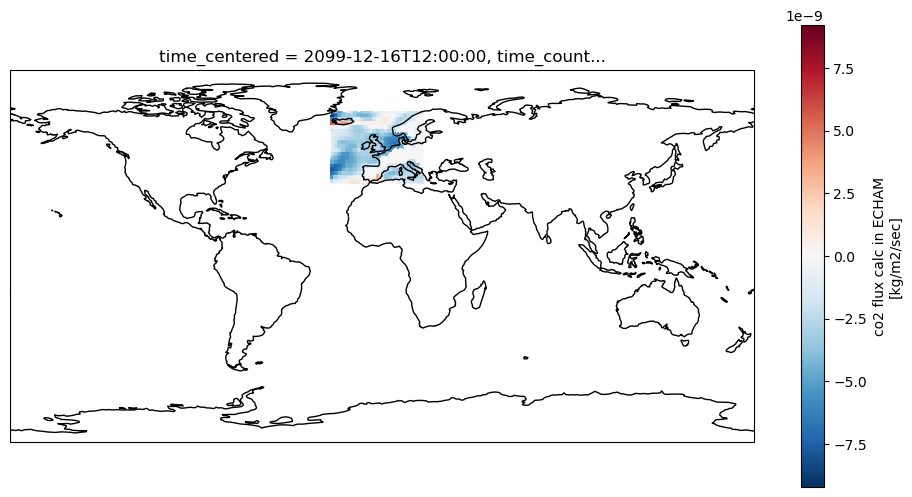

In [19]:
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
sliced_data.co2flux_cpl[1019].plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", add_colorbar=True)
ax.coastlines()

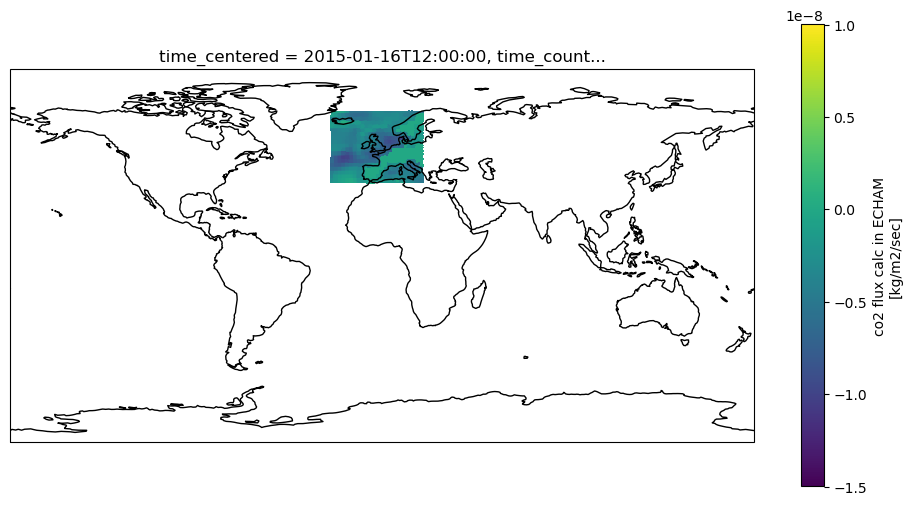

In [20]:
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
sliced_data.co2flux_cpl[0].plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", vmin=-0.000000015, vmax=0.00000001,
        add_colorbar=True
)
ax.coastlines()

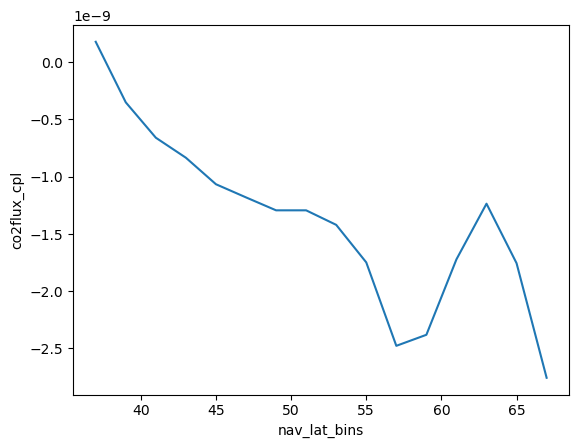

In [43]:
# calculate the mean CO2 flux at each latitude

# define two-degree wide latitude bins

lat_bins = np.arange(0, 91, 2)

# define a label for each bin corresponding to the central latitude

lat_center = np.arange(1, 90, 2)

# group according to those bins and take the mean

CO2flux_mean = sliced_data.co2flux_cpl.groupby_bins("nav_lat", lat_bins, labels=lat_center).mean(
    dim=xr.ALL_DIMS
)

# plot the result

CO2flux_mean.plot()

# https://docs.xarray.dev/en/stable/examples/multidimensional-coords.html 

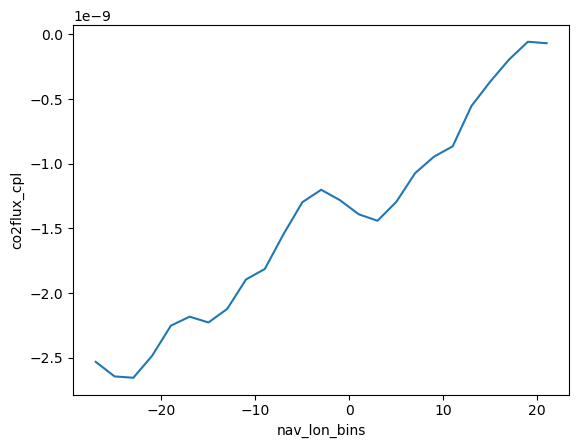

In [46]:
# calculate the mean CO2 flux at each longitude

# define two-degree wide latitude bins

lon_bins = np.arange(-100, 181, 2)

# define a label for each bin corresponding to the central latitude

lon_center = np.arange(-99, 180, 2)

# group according to those bins and take the mean

CO2flux_mean = sliced_data.co2flux_cpl.groupby_bins("nav_lon", lon_bins, labels=lon_center).mean(
    dim=xr.ALL_DIMS
)

# plot the result

CO2flux_mean.plot()

# https://docs.xarray.dev/en/stable/examples/multidimensional-coords.html 

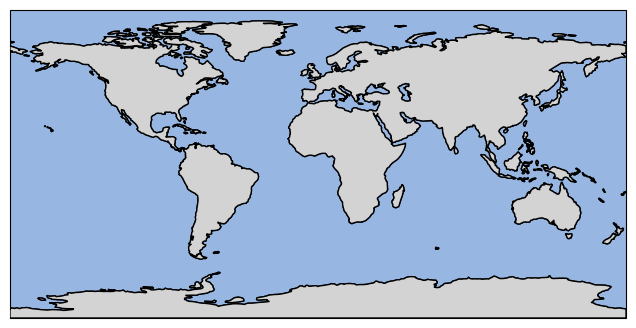

In [71]:
def make_figure():
    fig = plt.figure(figsize=(8, 4))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

    # generate a basemap with country borders, oceans and coastlines
    ax.add_feature(cfeat.LAND)
    ax.add_feature(cfeat.OCEAN)
    ax.add_feature(cfeat.COASTLINE)
    ax.add_feature(cfeat.BORDERS, linestyle='dotted')
    return fig, ax

make_figure();

Text(0.5, 1.02, 'CO2 flux')

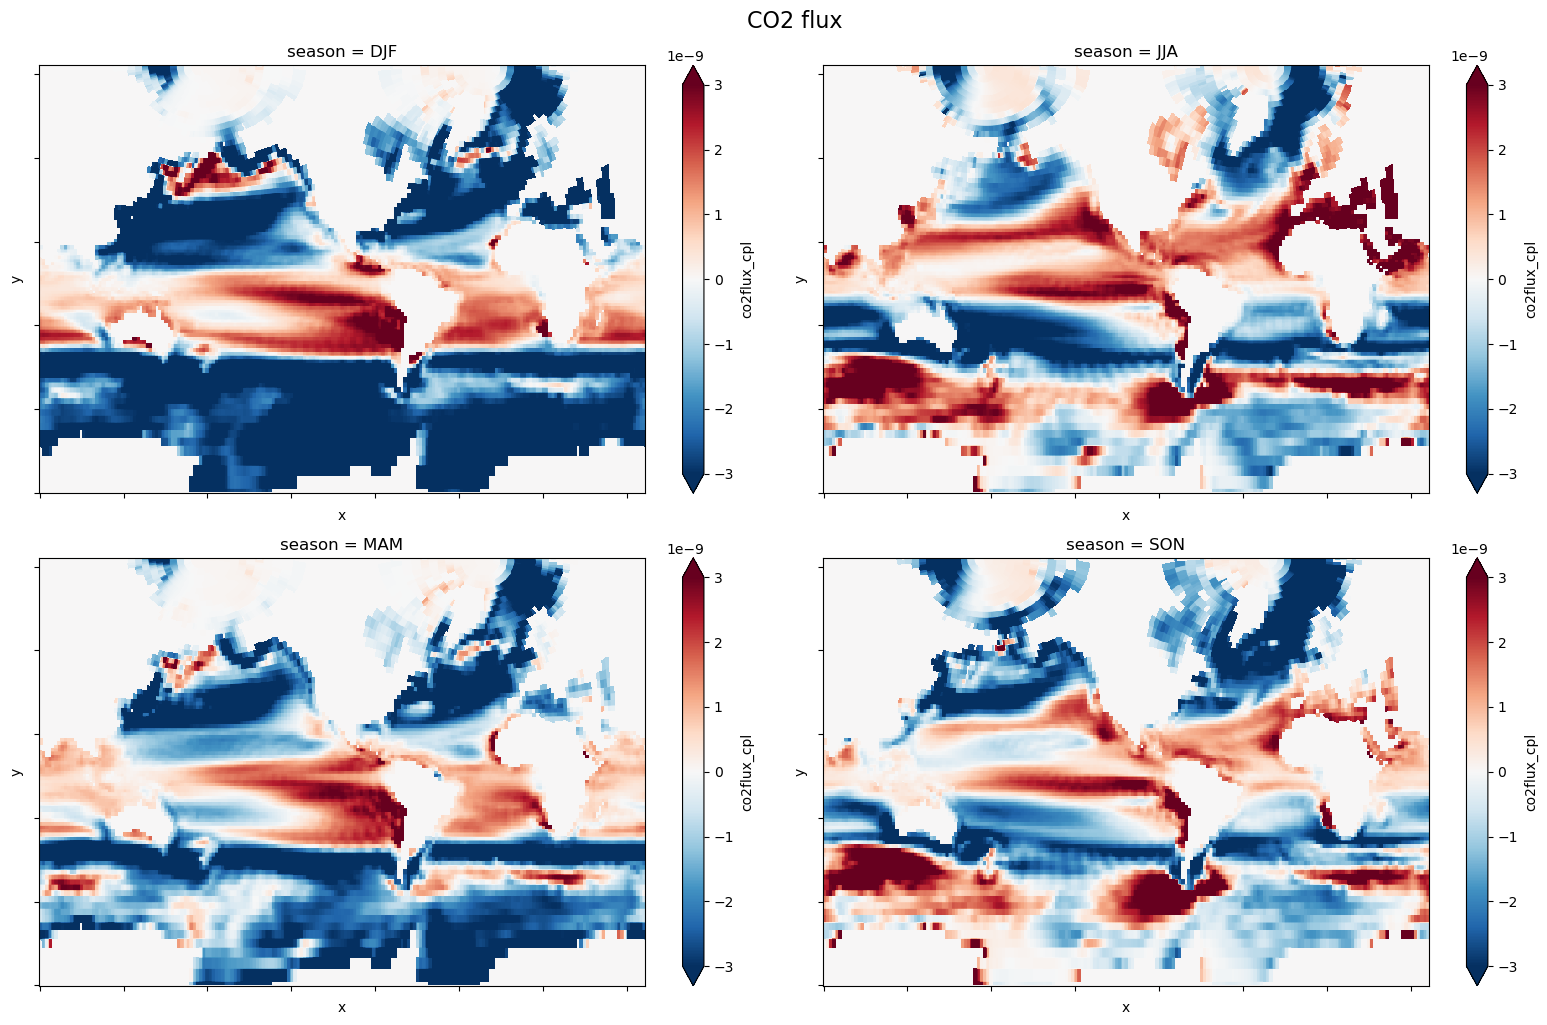

In [72]:
ds_season = ds.co2flux_cpl.groupby('time_counter.season').mean('time_counter')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10))

i = 0
for j, season in enumerate(('DJF', 'MAM', 'JJA', 'SON')):
    if season =='JJA':
        i += 1
        j = 0
        
    elif season =='SON':
        j = 1
        
    ds_season.sel(season=season).plot.pcolormesh(
        ax=axes[j, i], vmin=-0.000000003, vmax=0.000000003, cmap='RdBu_r',
        add_colorbar=True, extend='both')
    
for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis('tight')
   
plt.tight_layout()
fig.suptitle('CO2 flux', fontsize=16, y=1.02)

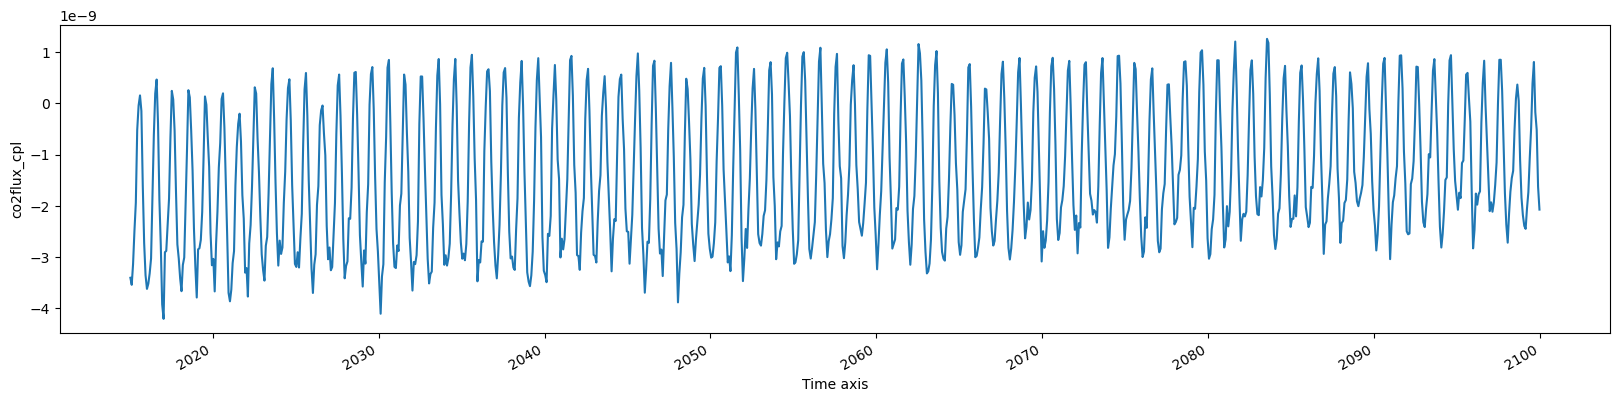

In [11]:
sliced_data.co2flux_cpl.mean(dim=('y', 'x')).plot(figsize= (20, 4)) # regional mean

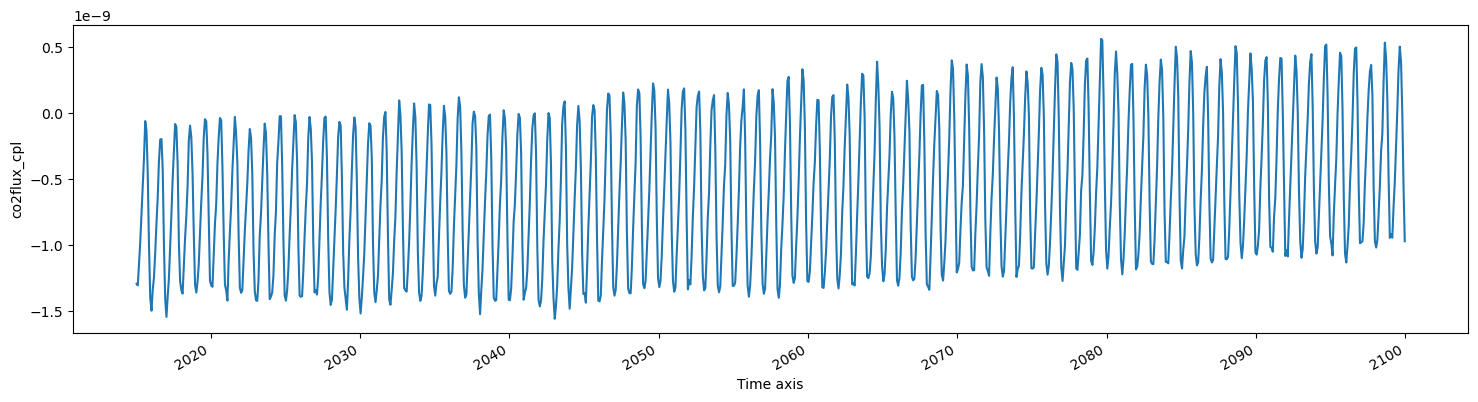

In [12]:
ds.co2flux_cpl.mean(dim=('y', 'x')).plot(figsize= (18, 4)) # global mean

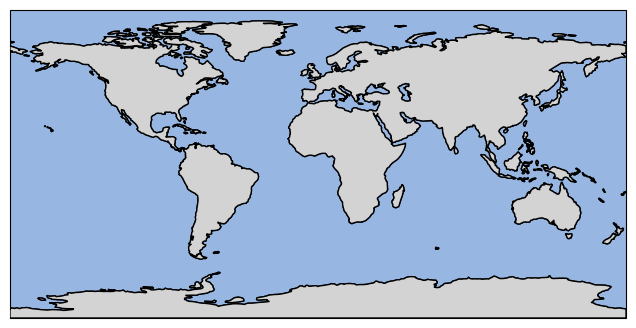

In [39]:
def make_figure():
    fig = plt.figure(figsize=(8, 4))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')

    # generate a basemap with country borders, oceans and coastlines
    ax.add_feature(cfeat.LAND)
    ax.add_feature(cfeat.OCEAN)
    ax.add_feature(cfeat.COASTLINE)
    ax.add_feature(cfeat.BORDERS, linestyle='dotted')
    return fig, ax

make_figure();

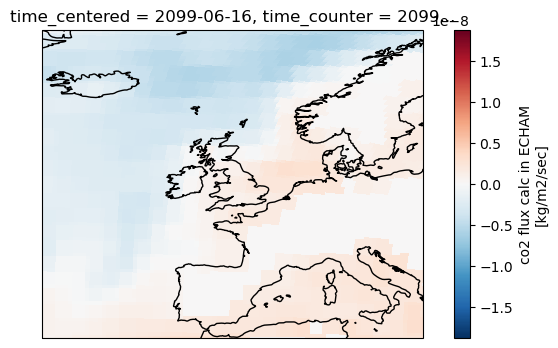

In [50]:
plt.figure(figsize=(8, 4))
ax = plt.axes(projection=ccrs.PlateCarree())


ds.co2flux_cpl[1013].plot.pcolormesh( # [] to select a month
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", 
    add_colorbar=True
)
ax.coastlines()
ax.set_extent([-25, 20, 35, 70]) # plot a region

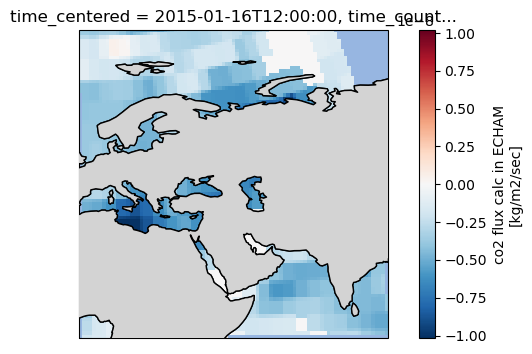

In [43]:
# _, ax = make_figure()

# sliced_data.co2flux_cpl[0].plot()

In [16]:
ds_date_range = ds.sel(time_counter=slice('2025', '2099')) # select a time range (from ... to ..., included)

In [17]:
sliced_data_timeframe = ds_date_range.where((-28 < ds.nav_lon) & (ds.nav_lon < 22) & (36 < ds.nav_lat) & (ds.nav_lat < 68), drop=True)

# https://stackoverflow.com/questions/41818927/how-to-subset-data-using-multidimensional-coordinates-using-python-xarray

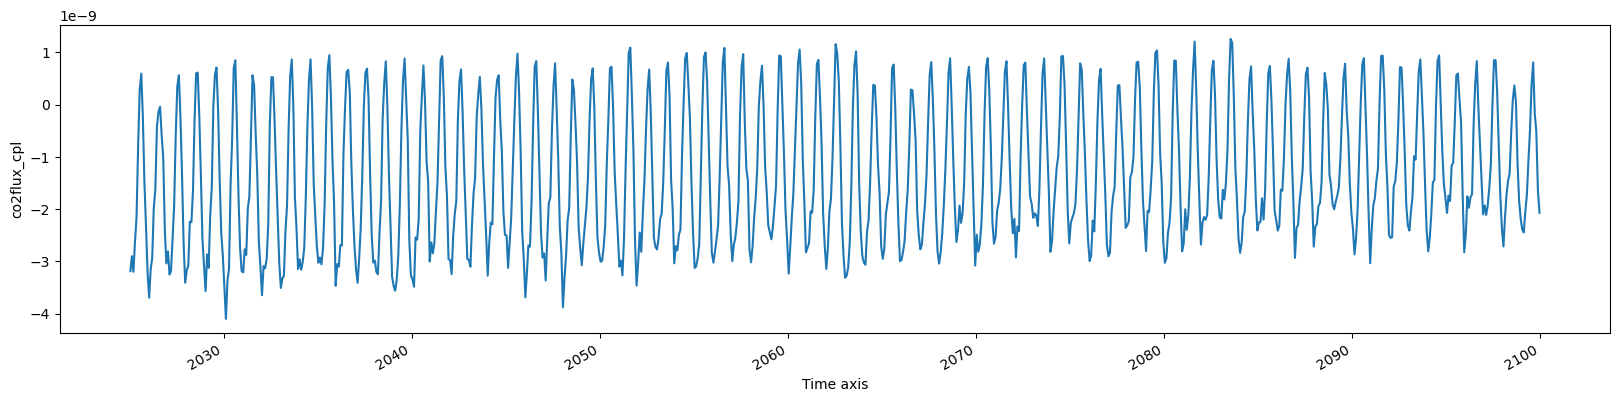

In [18]:
sliced_data_timeframe.co2flux_cpl.mean(dim=('y', 'x')).plot(figsize= (20, 4)) # regional mean for time period 2080 to 2085

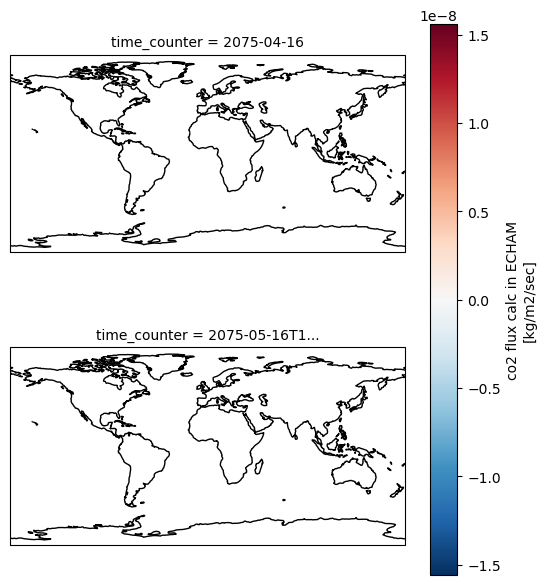

In [48]:
air = ds.co2flux_cpl.isel(time_counter=[723, 724])

# this is the map projection we want to plot *onto*

map_proj = ccrs.PlateCarree()

p = air.plot(
    transform=ccrs.LambertConformal(),  # the data's projection
    col="time_counter",
    col_wrap=1,  # multiplot settings
    aspect=ds.dims["x"] / ds.dims["y"],  # for a sensible figsize
    subplot_kws={"projection": map_proj},
    
)  # the plot's projection

for ax in p.axes.flat:
    ax.coastlines()
    ax.set_global()